In [1]:
import os
print(os.getcwd())

/Users/mac/Desktop/python_struggle/ML/Real-Time fraud Detection/notebooks


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_dataset(filepath: str = '../data/training/training_dataset.csv', ext: str = 'csv'):
    if ext == 'csv':
        return pd.read_csv(filepath)
    if ext == 'parquet':
        return pd.read_parquet(filepath)
    
    return pd.DataFrame({"Exception" : "Wrong file extension"})

In [4]:
df = load_dataset()

In [5]:
df

,transactionAmount,cardPresent,txn_count_30d,avg_amount_30d,max_amount_30d,card_present_ratio,fraud_rate,label
0,98.55,False,4,47.000000,98.55,0.250000,0.0,False
1,74.51,True,4,47.000000,98.55,0.250000,0.0,False
2,7.47,False,4,47.000000,98.55,0.250000,0.0,False
3,7.47,False,4,47.000000,98.55,0.250000,0.0,False
4,71.18,True,11,107.255455,523.67,0.636364,0.0,False
...,...,...,...,...,...,...,...,...
786358,119.92,False,110,109.030364,624.07,0.436364,0.0,False
786359,18.89,False,110,109.030364,624.07,0.436364,0.0,False
786360,49.43,False,110,109.030364,624.07,0.436364,0.0,False
786361,49.89,False,110,109.030364,624.07,0.436364,0.0,False


In [6]:
df.describe()

,transactionAmount,txn_count_30d,avg_amount_30d,max_amount_30d,card_present_ratio,fraud_rate
count,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,136.985791,2887.174929,136.985791,1017.397218,0.448734,0.015790
std,147.725569,6782.062684,20.634465,329.241542,0.313177,0.021210
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.650000,164.000000,134.759872,782.470000,0.152000,0.004425
50%,87.900000,508.000000,143.031380,1025.760000,0.435028,0.010319
75%,191.480000,2095.000000,146.070887,1281.060000,0.749334,0.020619
max,2011.540000,32850.000000,523.990000,2011.540000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transactionAmount   786363 non-null  float64
 1   cardPresent         786363 non-null  bool   
 2   txn_count_30d       786363 non-null  int64  
 3   avg_amount_30d      786363 non-null  float64
 4   max_amount_30d      786363 non-null  float64
 5   card_present_ratio  786363 non-null  float64
 6   fraud_rate          786363 non-null  float64
 7   label               786363 non-null  bool   
dtypes: bool(2), float64(5), int64(1)
memory usage: 37.5 MB


Fraud, %: 0.01579041740264992
Not a fraud, %: 0.98420958259735
Ratio: 62.32954820004832


Text(0.5, 1.0, 'Fraud Pie Distribution')

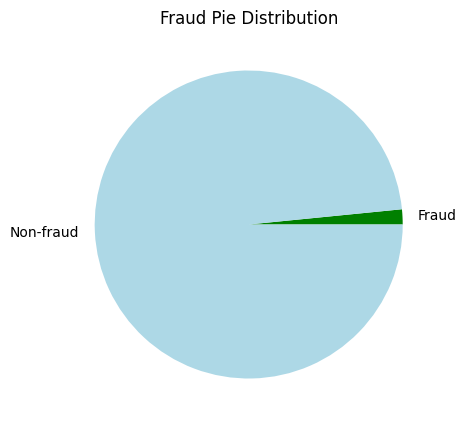

In [8]:
fraud_count = len(df[df['label'] == True])
non_fraud_count = len(df) - fraud_count

fraud_percent = fraud_count/(non_fraud_count + fraud_count)
non_fraud_percent = non_fraud_count/(fraud_count + non_fraud_count)

print(f'Fraud, %: {fraud_percent}')
print(f'Not a fraud, %: {non_fraud_percent}')
print(f'Ratio: {non_fraud_count / fraud_count}')
plt.figure(figsize=(5,5))
plt.pie([fraud_percent, non_fraud_percent], labels=['Fraud', 'Non-fraud'], colors=['green', 'lightblue'])
plt.title('Fraud Pie Distribution')

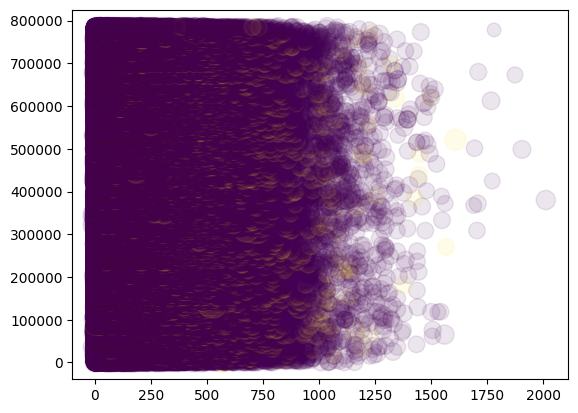

In [9]:
plt.scatter(df['transactionAmount'],df.index, c=df['label'], s=df['avg_amount_30d'], alpha=0.1)